## Baltimore City Salary Analysis

In [1]:
%matplotlib inline
import pandas as pd
import requests
import StringIO as StringIO
import numpy as np

In [2]:
url = "https://data.baltimorecity.gov/api/views/2j28-xzd7/rows.csv?accessType=DOWNLOAD"
r = requests.get(url)
data = StringIO.StringIO(r.content)

/home/ipynb/.ipyvirt/local/lib/python2.7/site-packages/requests/packages/urllib3/util/ssl_.py:90: InsecurePlatformWarning: A true SSLContext object is not available. This prevents urllib3 from configuring SSL appropriately and may cause certain SSL connections to fail. For more information, see https://urllib3.readthedocs.org/en/latest/security.html#insecureplatformwarning.
  InsecurePlatformWarning


read the urllib3 docs and decide if the warning matters to you.

In [3]:
dataframe = pd.read_csv(data,header=0)

We read the CSV into a dataframe. The header is called out as row0. data is of type FILE.

In [4]:
dataframe['AnnualSalary'] = dataframe['AnnualSalary'].str.lstrip('$')
dataframe['AnnualSalary'] = dataframe['AnnualSalary'].astype(float)

In [5]:
grouped = dataframe.groupby(['JobTitle'])['AnnualSalary']
aggregated = grouped.agg([np.sum, np.mean, np.std, np.size, np.min, np.max])

# sort the data
pd.set_option('display.max_rows', 10000000)
output = aggregated.sort(['amax'],ascending=0)
output.head(15)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
STATE'S ATTORNEY,238772.0,238772.000000,NaN,1,238772,238772
EXECUTIVE LEVEL III,1939968.0,161664.000000,23053.267708,12,132600,200000
CONTRACT SERV SPEC II,6205482.0,55905.243243,28837.184910,111,15392,187200
MAYOR,163365.0,163365.000000,NaN,1,163365,163365
CITY SOLICITOR,163200.0,163200.000000,NaN,1,163200,163200
DIRECTOR PUBLIC WORKS,163200.0,163200.000000,NaN,1,163200,163200
CONTRACT SERVICES SPEC. I,5366446.0,44350.793388,22709.853783,121,15392,156000
CITY AUDITOR,153600.0,153600.000000,NaN,1,153600,153600
EXECUTIVE LEVEL II,9653928.4,116312.390361,16394.384734,83,80000,150756


Now lets take a look at the data when grouped by JobTitle.

In [6]:
output = aggregated.sort(['sum','size'],ascending=[0,1])
output.head(15)

,sum,mean,std,size,amin,amax
JobTitle,,,,,,
POLICE OFFICER,113057468.0,60588.139335,8284.120895,1866,43999,71291
AIDE BLUE CHIP,54499380.0,11313.967200,117.949225,4817,11310,15600
EMT Firefighter Suppression,22000418.0,61453.681564,6562.939105,358,47475,75197
LABORER (Hourly),17865623.0,29925.666667,1297.986721,597,28309,33613
POLICE SERGEANT,17320452.0,78020.054054,3299.578516,222,69528,82704
POLICE OFFICER (EID),16235687.0,64942.748000,4487.637577,250,54463,73012
Fire Lieutenant Suppression,10862692.0,82293.121212,3538.303326,132,73821,86247
ASSISTANT STATE'S ATTORNEY,10462600.0,69750.666667,12861.042296,150,55000,94900
Firefighter/Paramedic Suppress,10096356.0,67760.778523,2859.659273,149,47476,77305


now lets graph it

In [7]:
aggregated = grouped.agg([np.sum])
output = aggregated.sort(['sum'],ascending=0)
output = output.head(15)
output.rename(columns={'sum': 'Salary'}, inplace=True)

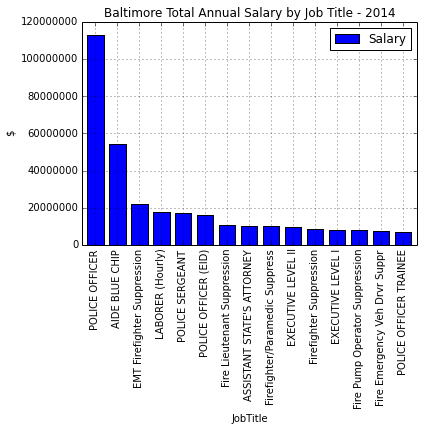

In [8]:
from matplotlib.ticker import FormatStrFormatter

myplot = output.plot(kind='bar',title='Baltimore Total Annual Salary by Job Title - 2014')
myplot.set_ylabel('$')
myplot.yaxis.set_major_formatter(FormatStrFormatter('%d'))